# Seminar 3 - Statistical Inference
Based on lecture 3 and 4

- Maximum Likelihood Estimators (MLE)
- Exponential Distrubution and Expectations

## Distributions

In [21]:
library("ggplot2")

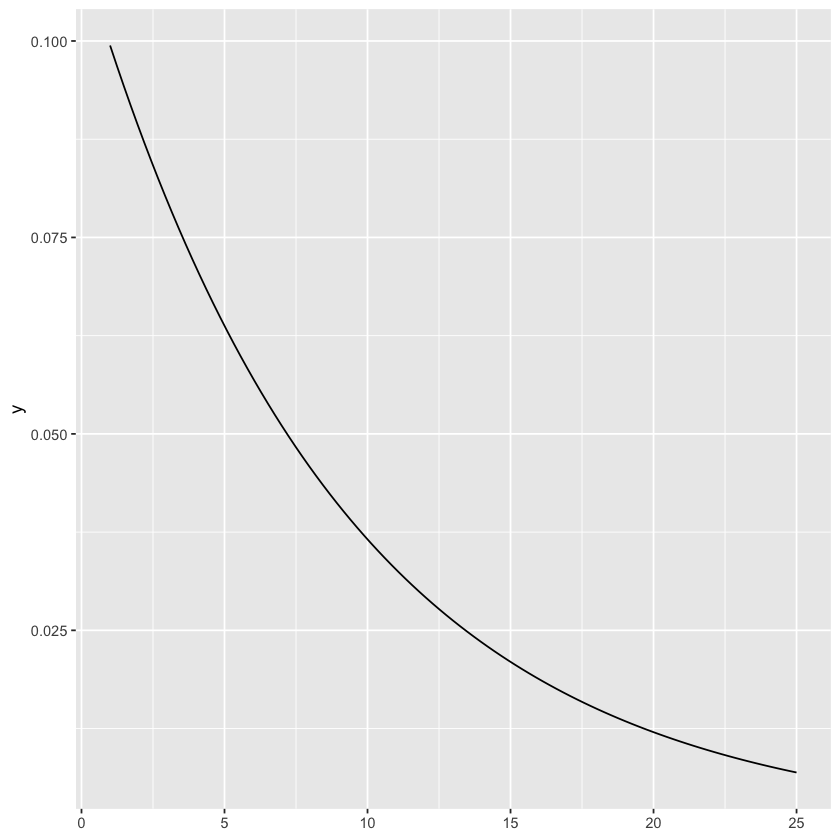

In [26]:
density <- function(x, l = 9) (1 / l) * exp(-x / l)
ggplot() +
  xlim(1, 25) +
  geom_function(fun = density)

In [23]:
# Expectation of X; mean of X along some collection
mean(density(c(1, 25)))

# Variance of X
var(density(c(1, 25)))

[1] 0.05316755

[1] 0.004279798

In [24]:
## Sampling

#  Log likelihood of samples
log_like <- function(u, ss, x_sample) {
    n <- length(x_sample)
    (-n / 2) * log(2 * pi) +
        (-n / 2) * log(ss) +
        (-1 / (2 * ss)) * sum(((x_sample - u)^2))
}

Warning message:
“Removed 1 row containing missing values (`geom_function()`).”


[1] -26.71688

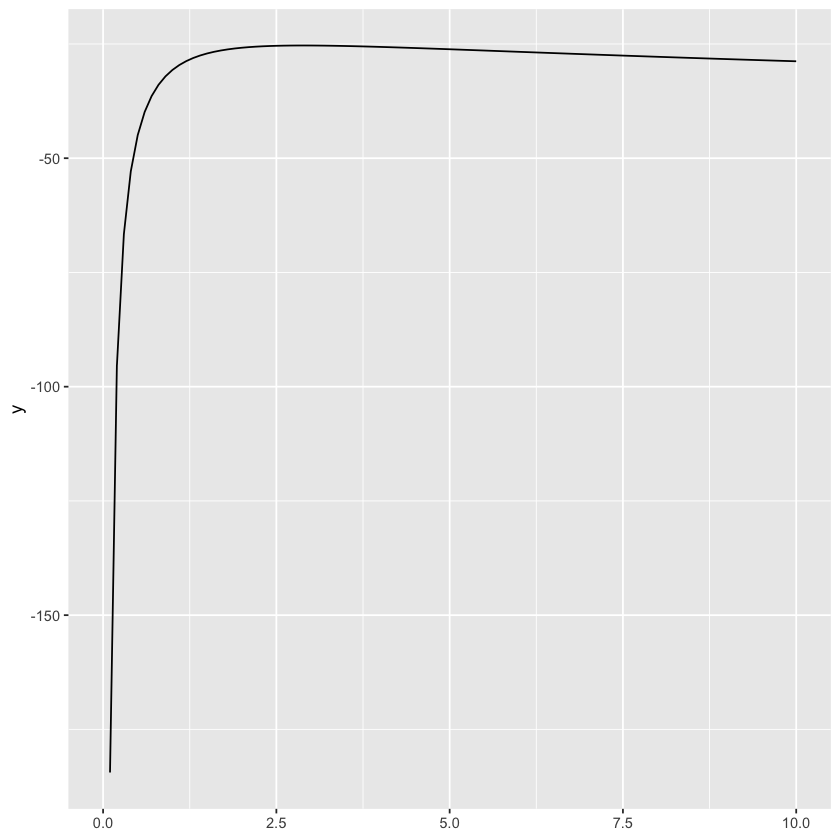

In [27]:
# Normal distribution samples
set.seed(1234)
samples <- rnorm(13, mean = 3, sd = 2)
ggplot() +
    xlim(0, 10) +
    geom_function(fun = function(ss) log_like(mean(samples), ss, samples))

log_like(mean(samples), 6, samples)

## Confidence Intervals

In [2]:
# Function to return
# - the estimated mean
# - its (1-α)-confidence interval
# - the width of the confidence interval
bands <- function(x_sample, ci) {
    # Number of samples
    n <- length(x_sample)
    
    # Estimated mean
    mean <- sum(x_sample) / n
    
    # Estimated standard deviation
    sd <- sum((x_sample - mean)^2) * (1 / (n - 1))
    
    ci_width <- dt(x = 1 - (ci / 2), n - 1) * (sd / sqrt(n))
    c(mean, (mean - ci_width), 2 * ci_width)
}

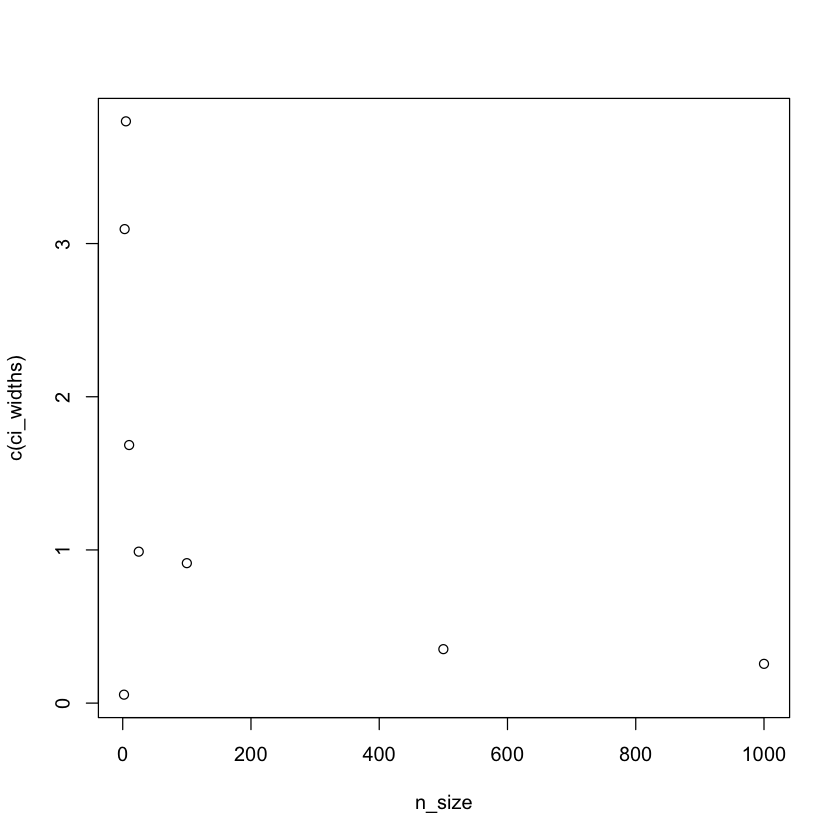

In [3]:
# Draw changing samples from normal distribution with fixed μ = 0
# and variance σ2=4, CI = 5%. Visualize how the width of the CI varies
n_size <- c(2, 3, 5, 10, 25, 100, 500, 1000)
ci_widths <- c()

for (n in n_size) {
    norm_samples <- rnorm(n, mean = 0, sd = 4)
    b <- bands(norm_samples, ci = 0.05)
    ci_widths <- c(ci_widths, b[3])
}

# could have much better visualization
plot(c(ci_widths) ~ n_size)

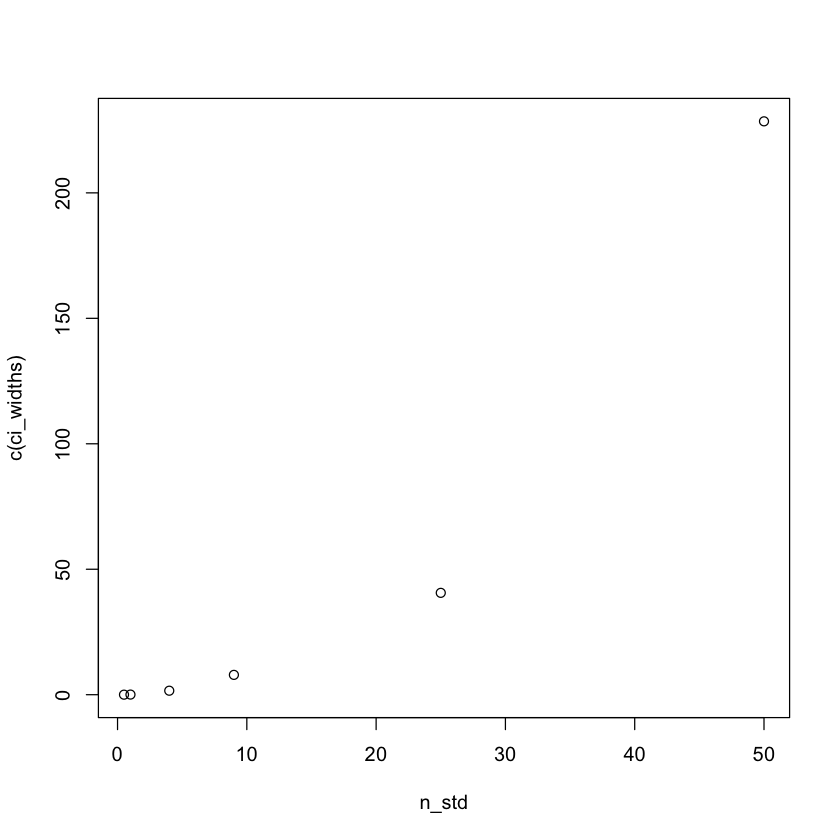

In [4]:
# Draw 25 samples from normal distribution with changing variance
# and mean μ = 0, CI = 5%. Visualize how the width of bands varies.
n_std <- c(0.5, 1, 4, 9, 25, 50)
ci_widths <- c()

for (sd in n_std) {
    norm_samples <- rnorm(25, mean = 0, sd = sd)
    b <- bands(norm_samples, ci = 0.05)
    ci_widths <- c(ci_widths, b[3])
}

# could have much better visualization
plot(c(ci_widths) ~ n_std)

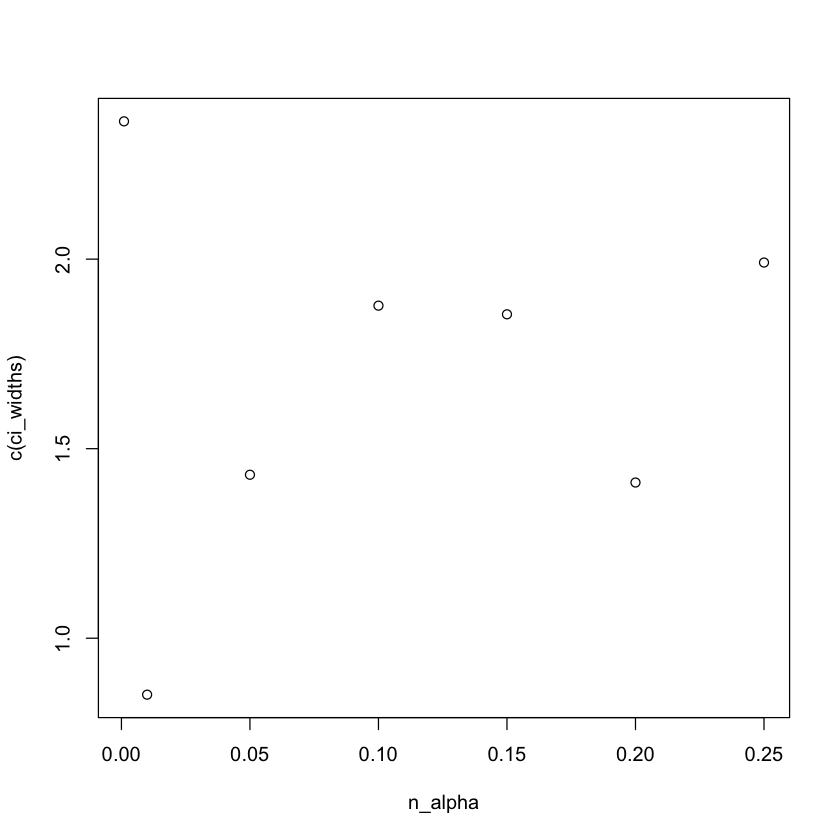

In [13]:
# Draw 25 samples from normal distribution with changing variance
# and mean μ = 0. Visualize how the width of the band varies relative to CI
n_alpha <- c(0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25)
ci_widths <- c()

for (a in n_alpha) {
    norm_samples <- rnorm(25, mean = 0, sd = 4)
    b <- bands(norm_samples, ci = a)
    ci_widths <- c(ci_widths, b[3])
}

# could have much better visualization
plot(c(ci_widths) ~ n_alpha)

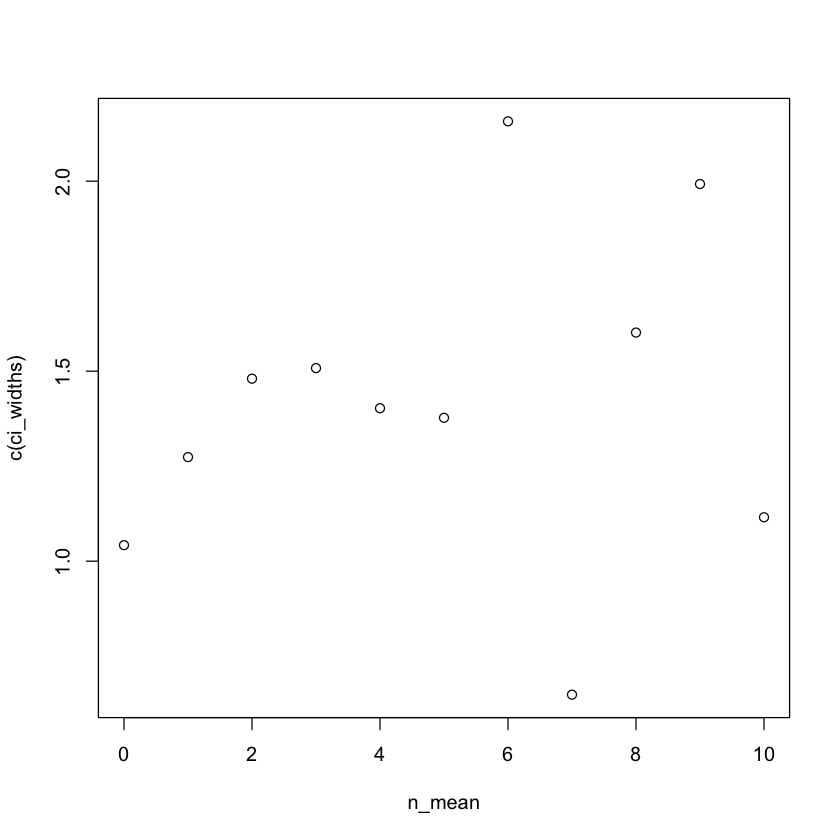

In [18]:
# Draw 25 samples from normal distribution with changing variance
# and mean μ = 0. Visualize how the width of the band varies relative to CI
n_mean <- c(0:10)
ci_widths <- c()

for (u in n_mean) {
    norm_samples <- rnorm(25, mean = u, sd = 4)
    b <- bands(norm_samples, ci = 0.05)
    ci_widths <- c(ci_widths, b[3])
}

# could have much better visualization
plot(c(ci_widths) ~ n_mean)

In [7]:
# The variance of X having exponentinal distribution having 𝜆=3.04 is Var(X) = ?
# f(x)=1/𝜆 * exp(-x/𝜆) for non-negative x and 0 otherwise.

# <!--  -->

# The expected value of the maximum of two independent exponentially distributed random variables X and Y with parameters 𝜆1=1 and 𝜆2=2 is ?.

# <!-- 3 -->

# First, set the seed of R's pseudo-random generator to the value 1234, by issuing the R-command > set.seed(1234)

# Now, draw a sample of size 𝑛=13 from a normal distribution with parameters 𝜇=3 and variance 𝜎2=4.

# When the parameter 𝜇 is set to be the sample mean, the log-likelihood function for 𝜎2 at the value 6 is ???.

# <!-- 4 -->